In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [65]:
import sklearn 

train_data = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv", header=0)
print(train_data[0:5])
print(train_data.shape)

validation = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv", header=0)
print(validation[100:105])
print(validation.shape)

   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0
(3000888, 6)
          id        date  store_nbr        family  onpromotion
100  3000988  2017-08-16         12     BABY CARE            0
101  3000989  2017-08-16         12        BEAUTY            2
102  3000990  2017-08-16         12     BEVERAGES           38
103  3000991  2017-08-16         12         BOOKS            0
104  3000992  2017-08-16         12  BREAD/BAKERY           17
(28512, 5)


         date      family  sales
0  2013-01-01  AUTOMOTIVE    0.0
1  2013-01-01   BABY CARE    0.0
2  2013-01-01      BEAUTY    0.0
3  2013-01-01   BEVERAGES    0.0
4  2013-01-01       BOOKS    0.0
(55572, 3)


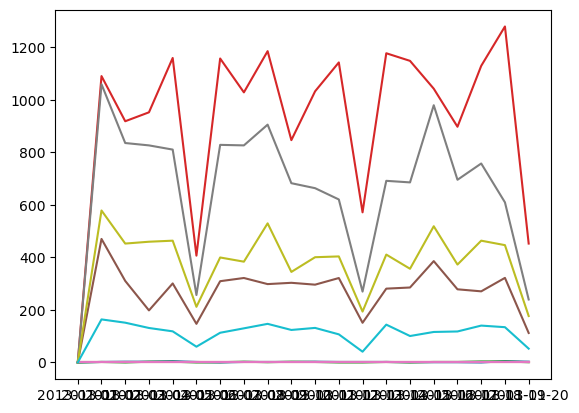

In [66]:
import matplotlib.pyplot as plt

#to_plot_family = train_data[train_data['family'] == 'AUTOMOTIVE']['sales']
to_plot = train_data[train_data['store_nbr']==1][['date', 'family', 'sales']]
print(to_plot[0:5])
print(to_plot.shape)

family_list = to_plot['family'].unique()

for fam in family_list[0:10]:
    xy = to_plot[to_plot['family']==fam][['date', 'sales']][0:20]
    plt.plot(xy['date'], xy['sales'])
        

In [71]:



from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

split_amount = int(len(train_data)*0.8)

X_train = train_data[['store_nbr', 'date', 'family', 'onpromotion']][0:split_amount]
y_train = train_data[['sales']][0:split_amount]
X_test = train_data[['store_nbr', 'date', 'family', 'onpromotion']][split_amount:]
y_test = train_data[['sales']][split_amount:]

#rand_forest = RandomForestRegressor(max_depth=100, random_state=0)
#rand_forest.fit(X_train, y_train)
#rand_forest.score(X_train, y_train)

In [70]:
#print(pd.to_datetime(to_plot['date'][0]).value)
train_data['date'].apply(lambda row: pd.to_datetime(row).value)
print(train_data[0:5])

KeyboardInterrupt: 